In [3]:
# matplotlib for testing
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sys
sys.path.append('../../../code/scripts')
from data_interact import get_patient

In [5]:
patient = get_patient('NDARAA075AMK')

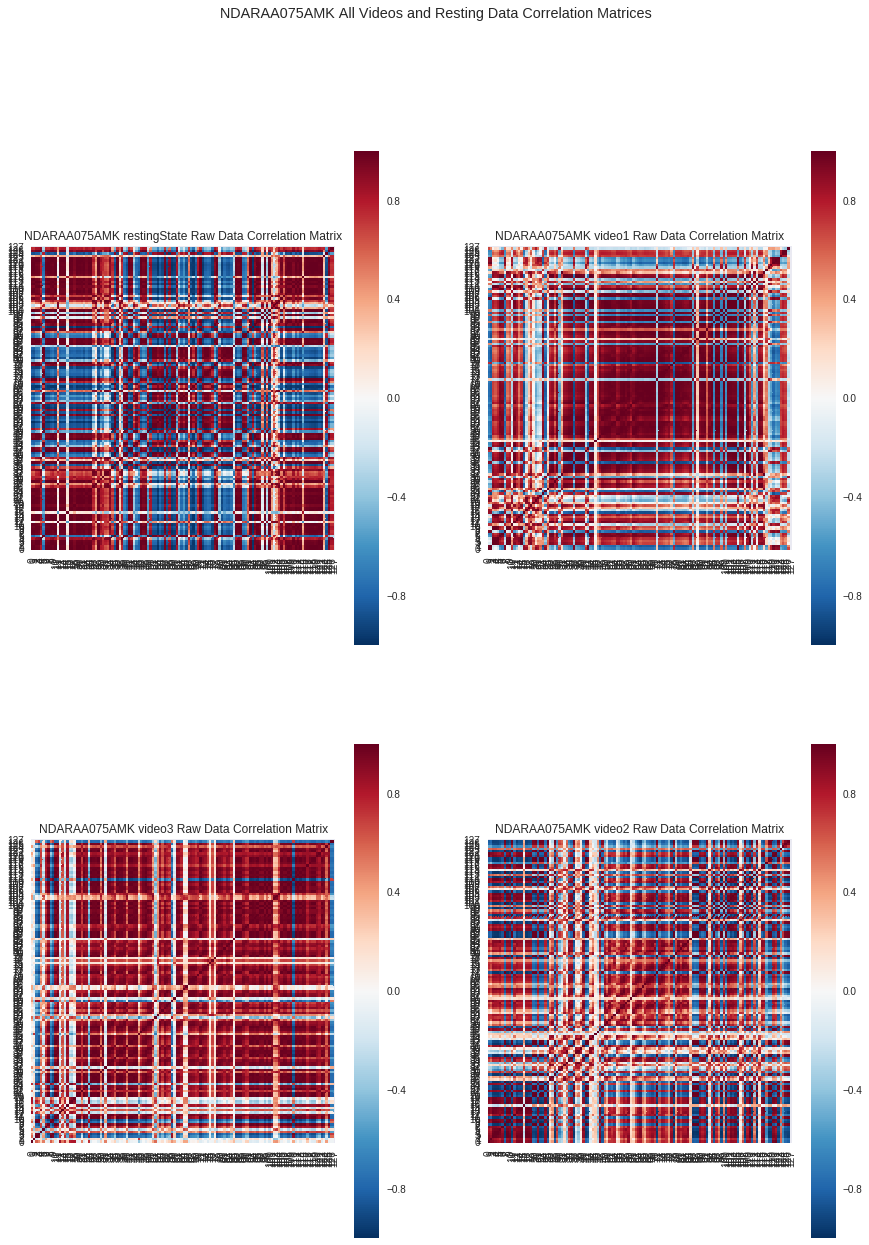

In [21]:
f, axarr = plt.subplots(2, 2, figsize=(15, 20))
f.suptitle('NDARAA075AMK All Videos and Resting Data Correlation Matrices')
f.subplots_adjust(wspace=.2, hspace=.2)

correlation_mat = dict()

i = 0
for key in patient.keys():
    # Make plot
    correlation_mat[key] = np.corrcoef(patient[key])
    axarr[i / 2, i % 2].set_title('NDARAA075AMK ' + key + ' Raw Data Correlation Matrix')
    g = sns.heatmap(correlation_mat[key], square=True, ax = axarr[i / 2, i % 2])
    g.invert_yaxis()
    i += 1

plt.show()

In [7]:
from sklearn import cluster

In [8]:
scanner = cluster.DBSCAN(metric='precomputed', min_samples=100)

In [9]:
for key in correlation_mat.keys():
    print np.any(scanner.fit_predict(correlation_mat[key][:127, :127]))

False
False
False
False


In [10]:
np.any(np.isnan(correlation_mat['restingState'][:127, :127]))

False

In [11]:
print correlation_mat['restingState'][:, 127]

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]


In [12]:
specter = cluster.SpectralClustering()

In [13]:
print correlation_mat

{'restingState': array([[ 1.        ,  0.99907874,  0.98283005, ...,  0.9184802 ,
         0.7534279 ,         nan],
       [ 0.99907874,  1.        ,  0.97653086, ...,  0.90630183,
         0.7332589 ,         nan],
       [ 0.98283005,  0.97653086,  1.        , ...,  0.96873867,
         0.82094696,         nan],
       ..., 
       [ 0.9184802 ,  0.90630183,  0.96873867, ...,  1.        ,
         0.86679747,         nan],
       [ 0.7534279 ,  0.7332589 ,  0.82094696, ...,  0.86679747,
         1.        ,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]]), 'video1': array([[ 1.        ,  0.97283903, -0.13783079, ..., -0.65290475,
         0.6651661 ,         nan],
       [ 0.97283903,  1.        , -0.2062607 , ..., -0.64365487,
         0.49202304,         nan],
       [-0.13783079, -0.2062607 ,  1.        , ...,  0.51576514,
         0.02760268,         nan],
       ..., 
       [-0.65290475, -0.64365487,  0.51576514

In [14]:
spectral_heat = specter.fit_predict(correlation_mat['restingState'][:127, :127])

/home/nitin/anaconda/lib/python2.7/site-packages/sklearn/cluster/spectral.py:433: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [15]:
def permute_corr_mat(corr_mat, clustering):
    cluster_sets = dict()
    for i in range(len(clustering)):
        cluster_elecs = cluster_sets.get(clustering[i], [])
        cluster_elecs.append(i)
        cluster_sets[clustering[i]] = cluster_elecs
    
    plot_permutation = []
    for key in cluster_sets.keys():
        plot_permutation += cluster_sets[key]
    
    perm_corr = np.copy(corr_mat)
    return (perm_corr[plot_permutation, :])[:, plot_permutation], plot_permutation, cluster_sets

In [16]:
print spectral_heat

[3 3 0 0 1 2 3 3 3 0 3 5 3 0 3 5 3 3 0 3 3 3 3 3 3 3 1 6 3 1 5 1 1 5 5 2 3
 5 1 2 2 3 0 7 2 5 3 0 0 5 5 2 2 5 2 2 3 2 5 5 2 1 7 2 5 2 5 2 4 2 5 3 2 2
 2 2 4 5 3 7 2 2 2 2 2 5 3 0 3 2 5 5 3 4 5 3 0 5 3 5 3 6 5 6 1 0 1 0 3 3 5
 3 0 3 5 3 3 3 3 3 3 3 3 5 5 5 1]


In [17]:
reordered_corr, perm_labels, clustering = permute_corr_mat(correlation_mat['restingState'][:127, :127], spectral_heat)

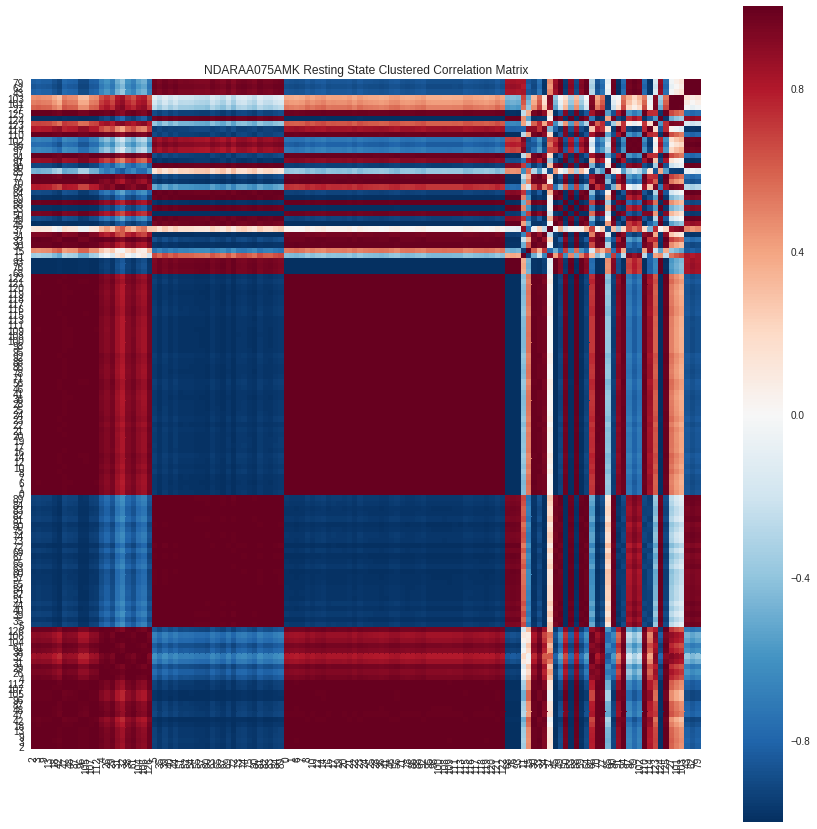

In [18]:
correlation_mat = np.corrcoef(reordered_corr)
plt.figure(figsize=(15,15))
plt.title('NDARAA075AMK Resting State Clustered Correlation Matrix')
ax = sns.heatmap(correlation_mat, square=True)
ax.set_xticklabels(perm_labels)
ax.set_yticklabels(perm_labels[::-1])
ax.invert_yaxis()

plt.show()

## Default Spectral Clustering Parameters

- RBF kernel
- 10 iterations of k means
- 8 clusters

In [19]:
def investigate_clustering(corr_mat, sklearn_obj):
    clustering = sklearn_obj.fit_predict(corr_mat)
    reordered_corr, perm_labels, clustering = permute_corr_mat(corr_mat, clustering)
    
    f, axarr = plt.subplots(1, 2, figsize=(20, 10))
    f.suptitle('NDARAA075AMK All Videos and Resting Data Correlation Matrices')
    f.subplots_adjust(wspace=.2, hspace=.2)
    
#     plt.figure(figsize=(15,15))
#     plt.title('NDARAA075AMK Resting State Clustered Correlation Matrix')
    sns.heatmap(reordered_corr, square=True, ax=axarr[0])
    axarr[0].set_xticklabels(perm_labels)
    axarr[0].set_yticklabels(perm_labels[::-1])
    axarr[0].invert_yaxis()

    sns.heatmap(corr_mat, square=True, ax=axarr[1])
    axarr[1].set_xticklabels(perm_labels)
    axarr[1].set_yticklabels(perm_labels[::-1])
    axarr[1].invert_yaxis()
    
    plt.show()

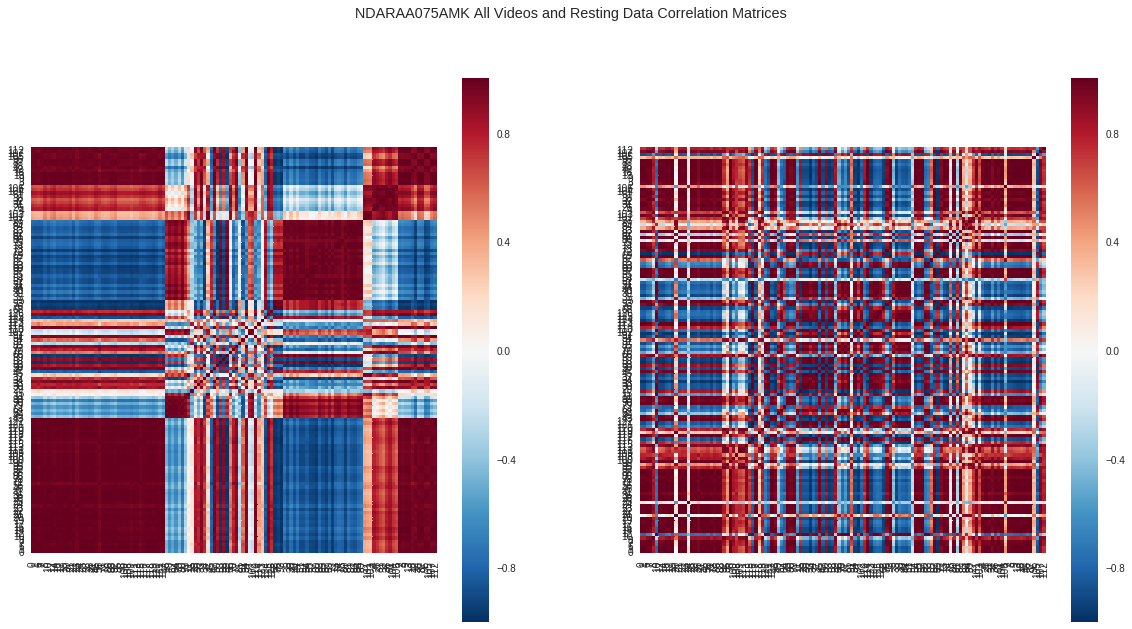

In [22]:
investigate_clustering(correlation_mat['restingState'][:127, :127], cluster.SpectralClustering())

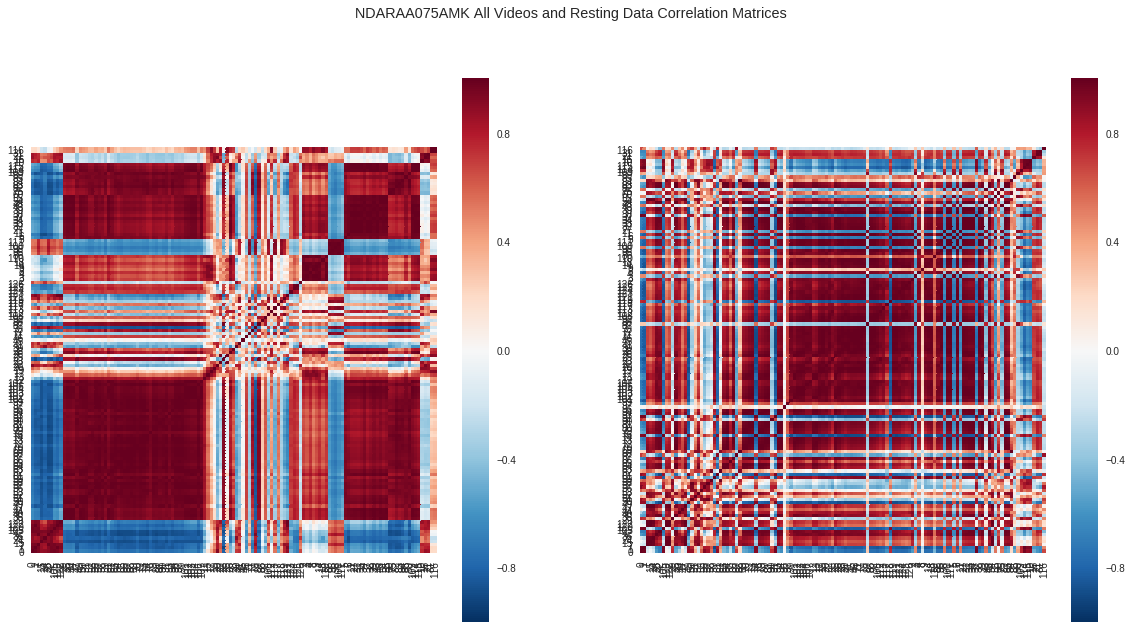

In [23]:
investigate_clustering(correlation_mat['video1'][:127, :127], cluster.SpectralClustering())

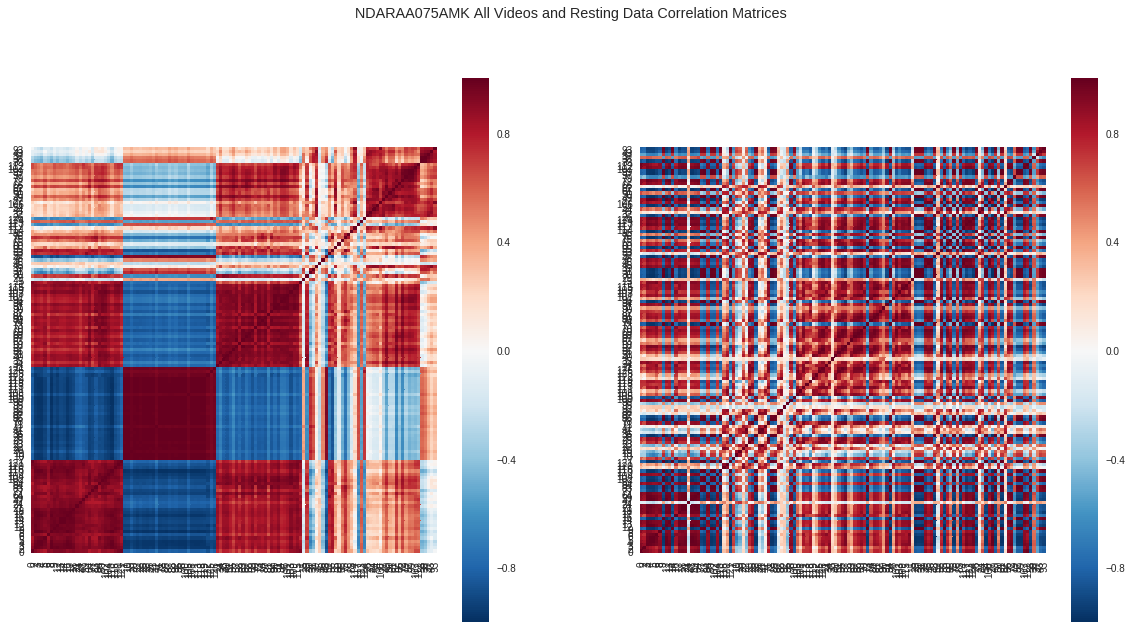

In [24]:
investigate_clustering(correlation_mat['video2'][:127, :127], cluster.SpectralClustering())

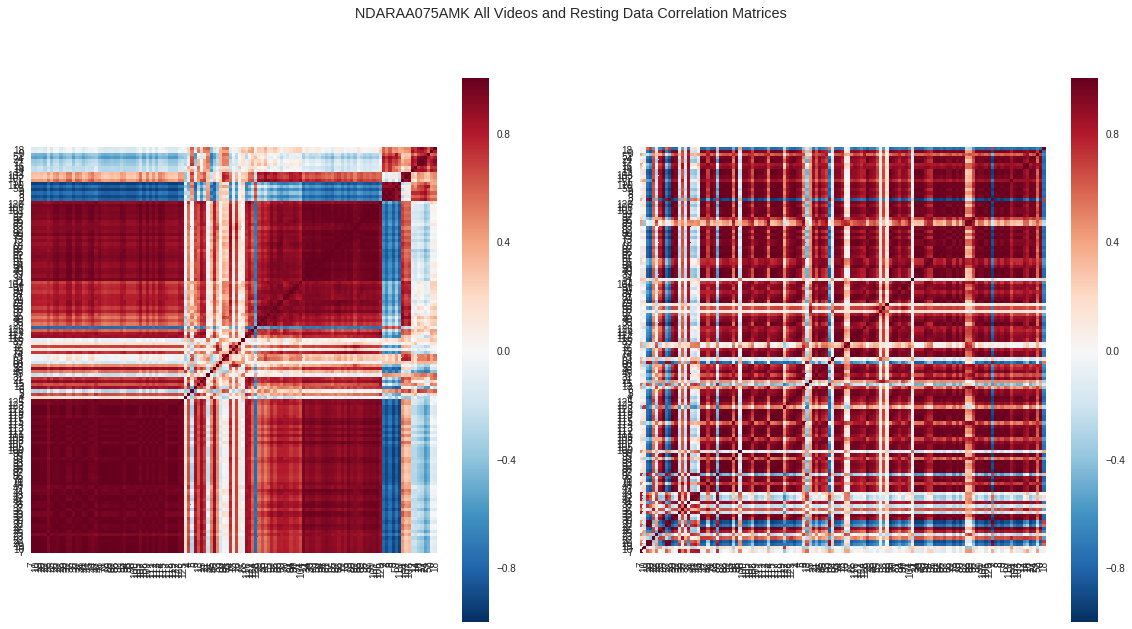

In [25]:
investigate_clustering(correlation_mat['video3'][:127, :127], cluster.SpectralClustering())